In [1]:
from pathlib import Path
import pandas as pd


round_4_data_path = Path(r"/home/zr/code/trading_project/exploratory_analysis/Prosperity2Data/round-4-island-data-bottle")
prices_day_1_csv = round_4_data_path / Path("prices_round_4_day_1.csv")
prices_day_2_csv = round_4_data_path / Path("prices_round_4_day_2.csv")


day_1 = pd.read_csv(prices_day_1_csv, sep=";")
day_2 = pd.read_csv(prices_day_2_csv, sep=";")

data = pd.concat([day_1, day_2]).reset_index()
data

,index,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,19995,2,999700,COCONUT,9986.0,143.0,9985.0,51.0,NaN,NaN,9987,143,9988.0,51.0,NaN,NaN,9986.5,0.0
39996,19996,2,999800,COCONUT_COUPON,620.0,44.0,NaN,NaN,NaN,NaN,621,44,NaN,NaN,NaN,NaN,620.5,0.0
39997,19997,2,999800,COCONUT,9989.0,119.0,9988.0,57.0,NaN,NaN,9990,119,9991.0,57.0,NaN,NaN,9989.5,0.0
39998,19998,2,999900,COCONUT,9989.0,212.0,NaN,NaN,NaN,NaN,9991,137,9992.0,75.0,NaN,NaN,9990.0,0.0


In [2]:
d = {}
for product in data["product"].unique():
    d[product] = data[data["product"] == product]

d

{'COCONUT':        index  day  timestamp  product  bid_price_1  bid_volume_1  bid_price_2  \
 0          0    1          0  COCONUT       9999.0         200.0          NaN   
 2          2    1        100  COCONUT       9999.0         104.0       9998.0   
 4          4    1        200  COCONUT       9998.0         133.0       9997.0   
 7          7    1        300  COCONUT       9999.0         149.0       9998.0   
 8          8    1        400  COCONUT       9998.0         108.0       9997.0   
 ...      ...  ...        ...      ...          ...           ...          ...   
 39990  19990    2     999500  COCONUT       9987.0         110.0       9986.0   
 39993  19993    2     999600  COCONUT       9986.0         101.0       9985.0   
 39995  19995    2     999700  COCONUT       9986.0         143.0       9985.0   
 39997  19997    2     999800  COCONUT       9989.0         119.0       9988.0   
 39998  19998    2     999900  COCONUT       9989.0         212.0          NaN   
 
   

In [3]:
len(d)

2

In [7]:
d["COCONUT"]["mid_price"].describe()

count    20000.000000
mean     10053.999475
std         48.625249
min       9942.000000
25%      10026.000000
50%      10057.500000
75%      10093.000000
max      10144.000000
Name: mid_price, dtype: float64

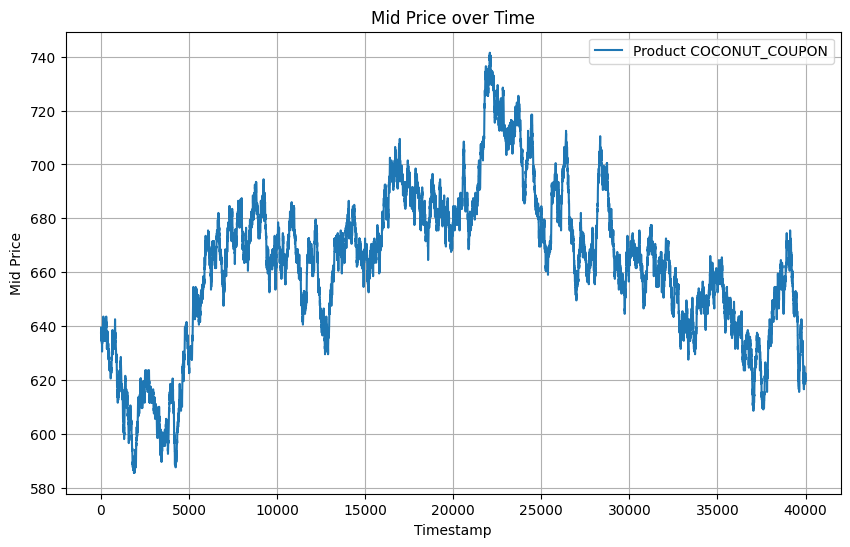

In [17]:
# Plotting
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 6))  # Set the figure size


products = ["COCONUT_COUPON"]
for product in products:
    product_data = d[product]
    plt.plot(product_data['mid_price'], label=f'Product {product}')

plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price over Time')
plt.legend()
plt.grid(True)  # Optionally add a grid
# plt.ylim(9980, 10020)

# # Add in a line for mean
# plt.axhline(y = 9996.58940 , color = 'r', linestyle = '-') 
  
# rendering the plot 
plt.show()
